<a href="https://colab.research.google.com/github/meryreddoor/yogagame_/blob/primeraRama/Cropping_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

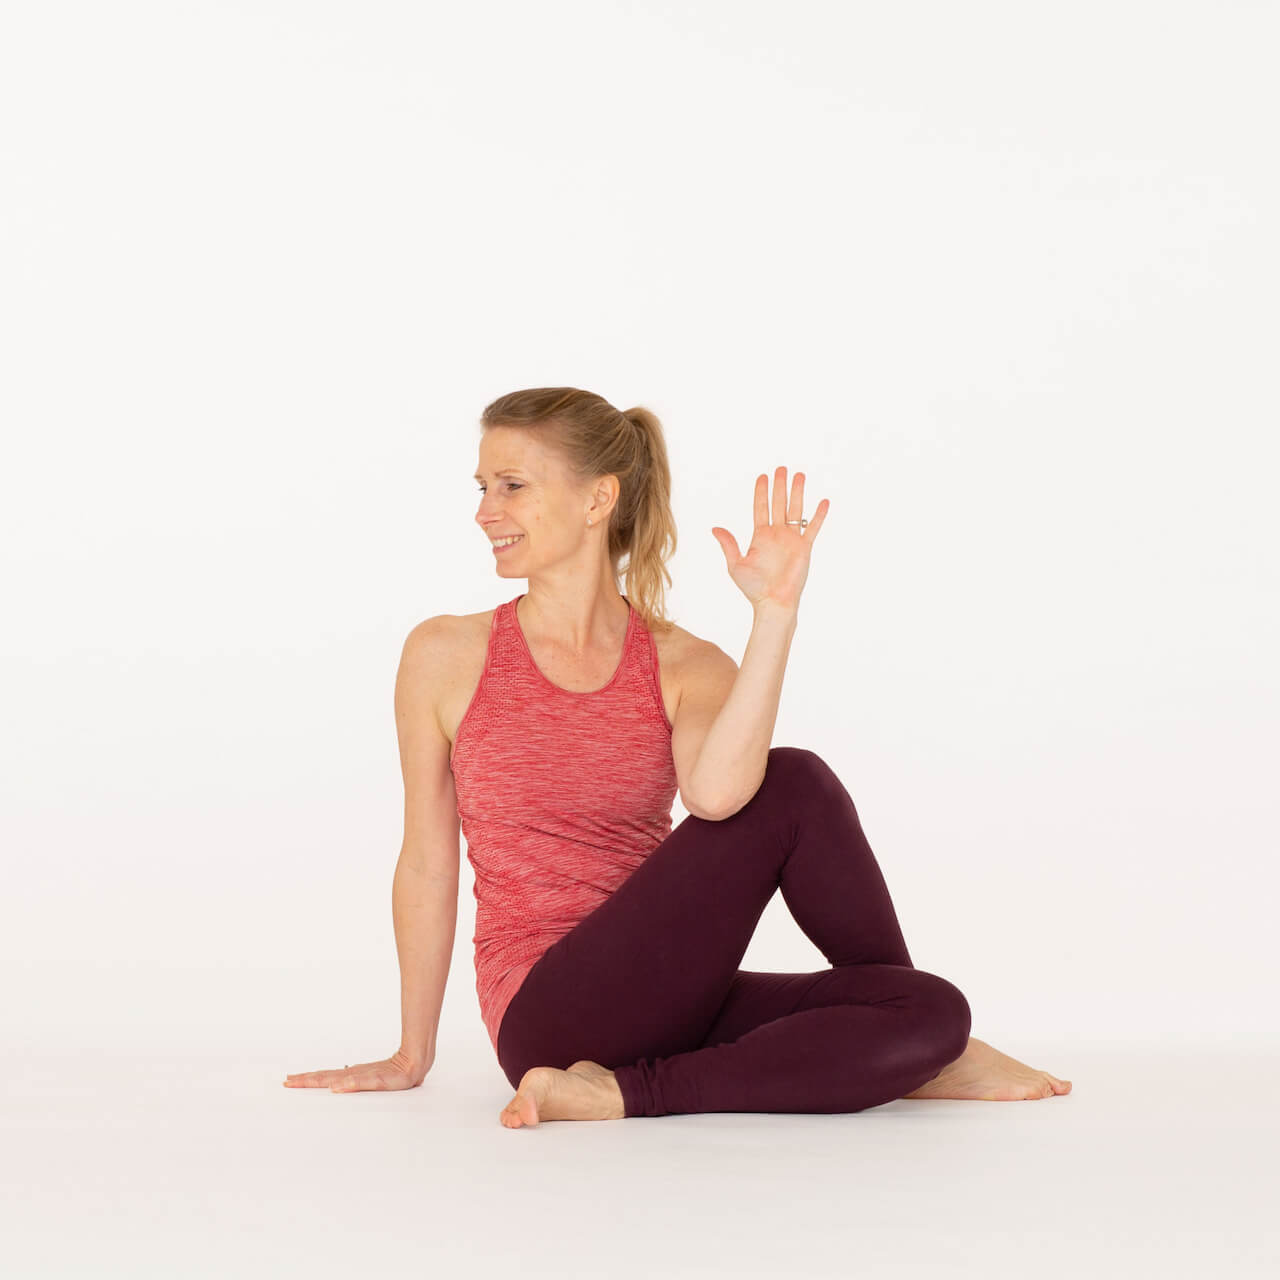

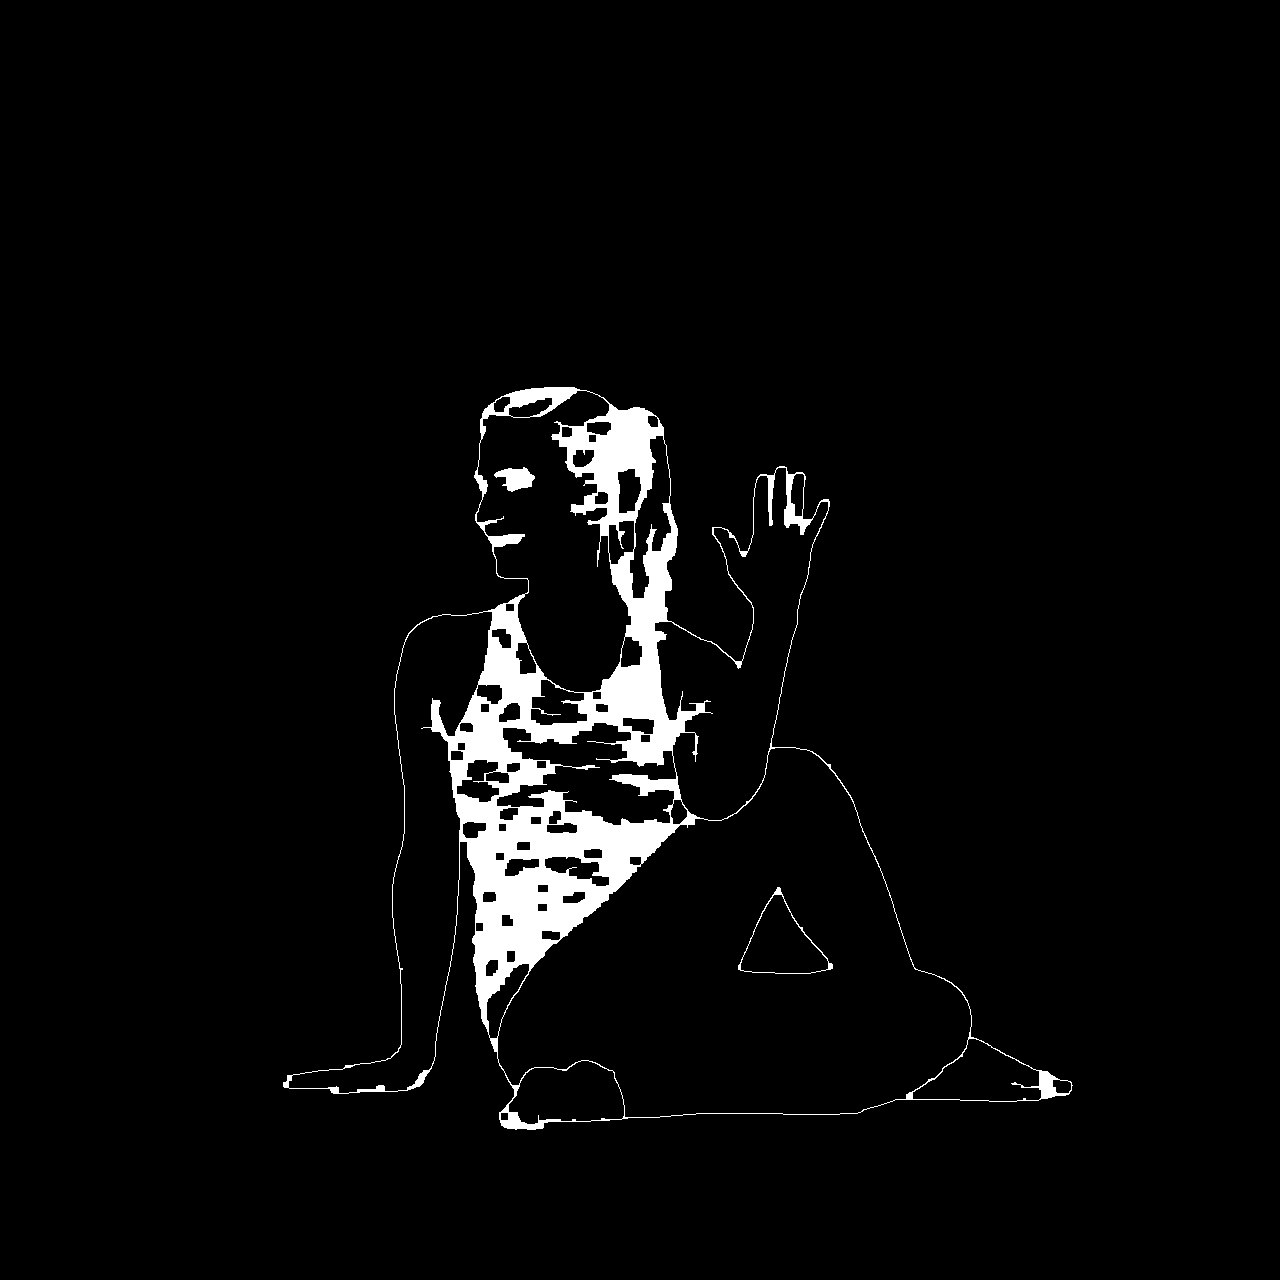

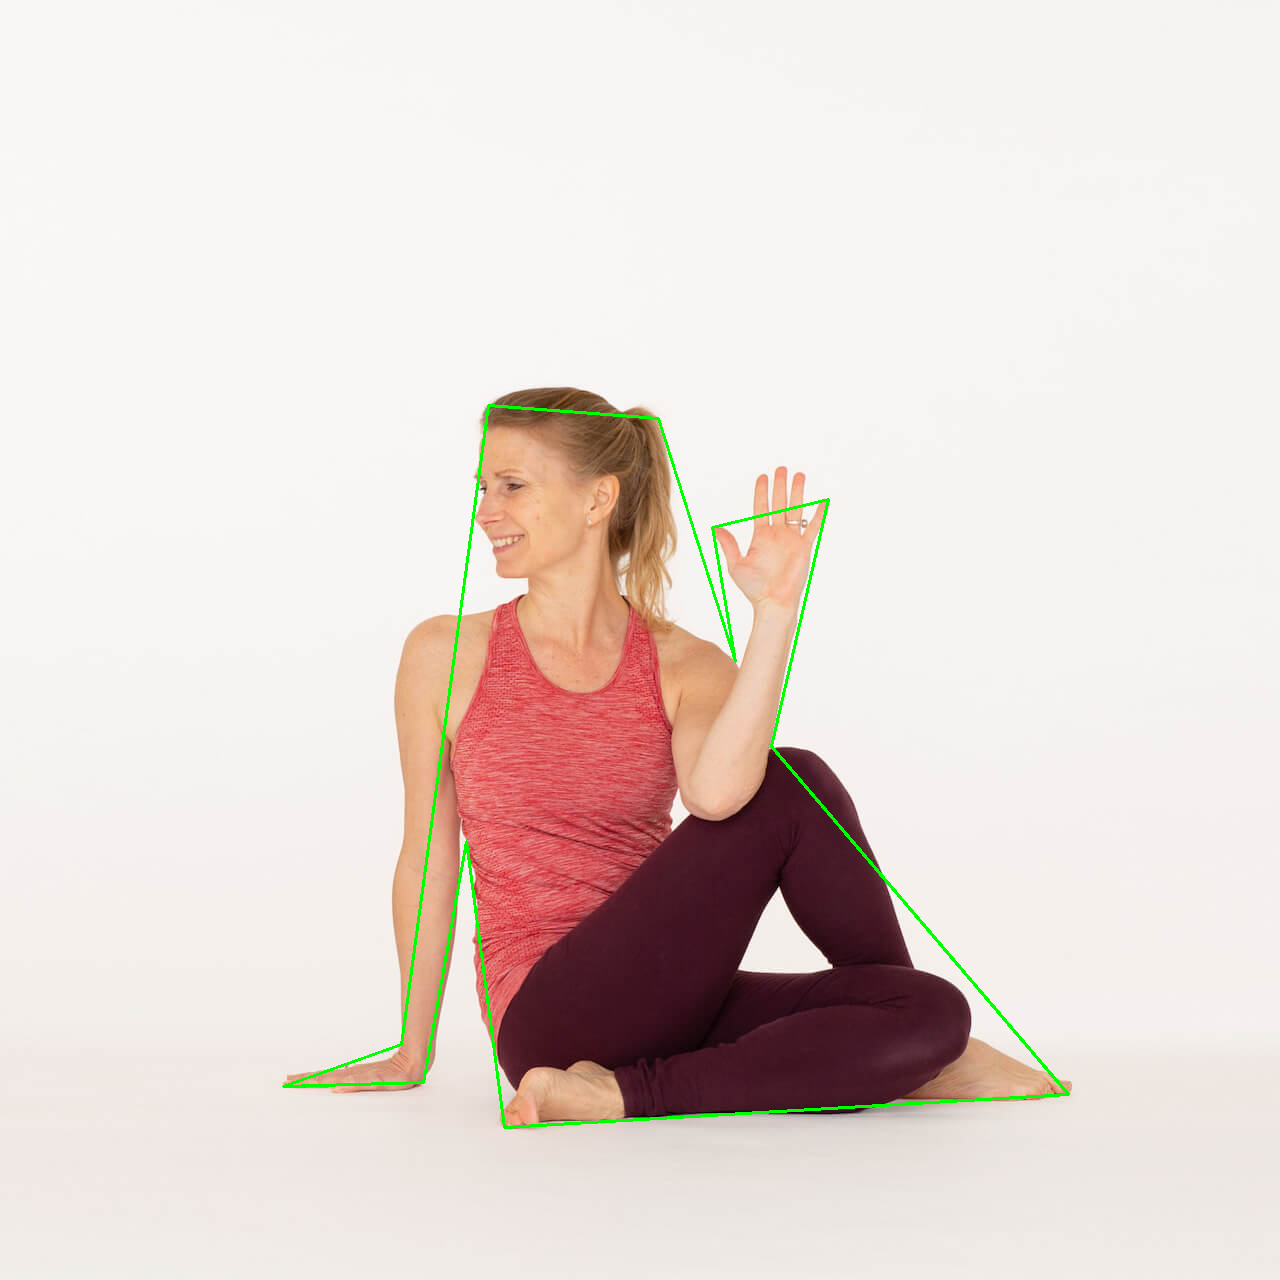

-1

In [85]:
import cv2
from google.colab.patches import cv2_imshow

#reading the image 
image = cv2.imread("/content/sentada.jpeg", cv2.IMREAD_UNCHANGED)
edged = cv2.Canny(image, 10, 250)
cv2_imshow(image)

cv2.waitKey(0)

#applying closing function 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)
cv2.waitKey(0)
 
#finding_contours 
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
for c in cnts:
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
cv2_imshow(image)
cv2.waitKey(0)


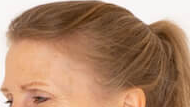

-1

In [113]:
import cv2 
image = cv2.imread("/content/sentada.jpeg", cv2.IMREAD_UNCHANGED)
edged = cv2.Canny(image,100, 100)
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
idx = 0
for c in cnts:
	x,y,w,h = cv2.boundingRect(c)
	if w>2000 and h>2000:
		idx+=1
		new_img=image[y:y+h,x:x+w]
		cv2.imwrite(str(idx) + '.png', new_img)
cv2_imshow(new_img)
cv2.waitKey(0)

In [114]:
def transform(pos):
# This function is used to find the corners of the object
# and the dimensions of the object
pos = cv2.imread("/content/sentada.jpeg", cv2.IMREAD_UNCHANGED)
pts=[]
n=len(pos)
for i in range(n):
  pts.append(list(pos[i][0]))
  
sums={}
diffs={}
tl=tr=bl=br=0
for i in pts:
  x=i[0]
  y=i[1]
  sum=x+y
  diff=y-x
  sums[sum]=i
  diffs[diff]=i
sums=sorted(sums.items())
diffs=sorted(diffs.items())
n=len(sums)
rect=[sums[0][1],diffs[0][1],diffs[n-1][1],sums[n-1][1]]
#	   top-left   top-right   bottom-left   bottom-right

h1=np.sqrt((rect[0][0]-rect[2][0])**2 + (rect[0][1]-rect[2][1])**2)		#height of left side
h2=np.sqrt((rect[1][0]-rect[3][0])**2 + (rect[1][1]-rect[3][1])**2)		#height of right side
h=max(h1,h2)

w1=np.sqrt((rect[0][0]-rect[1][0])**2 + (rect[0][1]-rect[1][1])**2)		#width of upper side
w2=np.sqrt((rect[2][0]-rect[3][0])**2 + (rect[2][1]-rect[3][1])**2)		#width of lower side
w=max(w1,w2)
#return int(w),int(h),rect

IndentationError: ignored